In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# read the dataset
df = pd.read_csv('Loan_clean (1).csv')
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<AxesSubplot:>

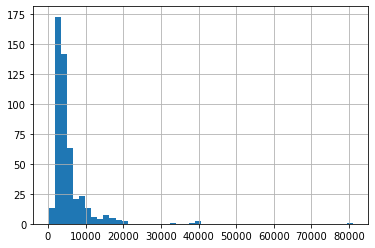

In [2]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

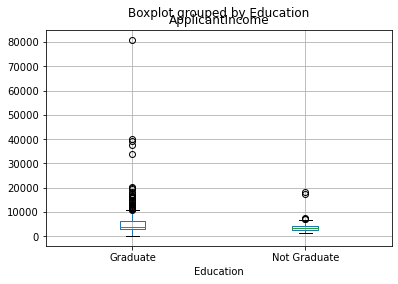

In [3]:
df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

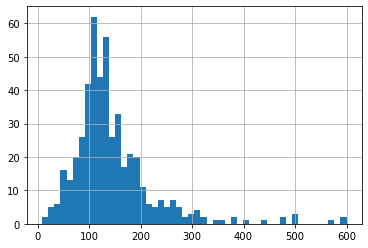

In [4]:
df['LoanAmount'].hist(bins=50)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

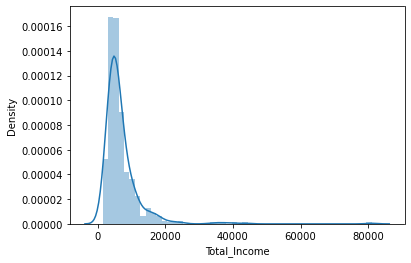

In [5]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']
sns.distplot(df["Total_Income"])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

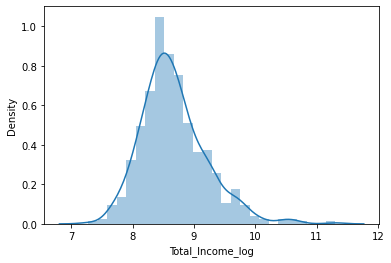

In [6]:
df['Total_Income_log']=np.log(df["Total_Income"])
sns.distplot(df["Total_Income_log"])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

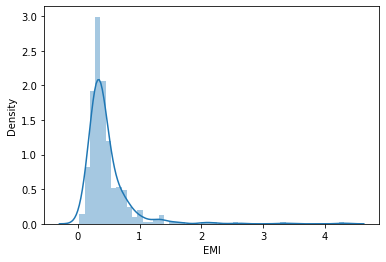

In [7]:
df['EMI']=df["LoanAmount"]/df['Loan_Amount_Term']
sns.distplot(df["EMI"])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

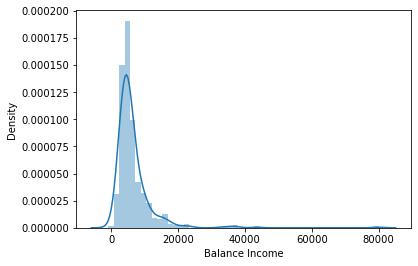

In [8]:
#Multiplying by 1000 to make the units equal 
df['Balance Income']=df["Total_Income"]-(df['EMI']*1000)
sns.distplot(df["Balance Income"])

In [9]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

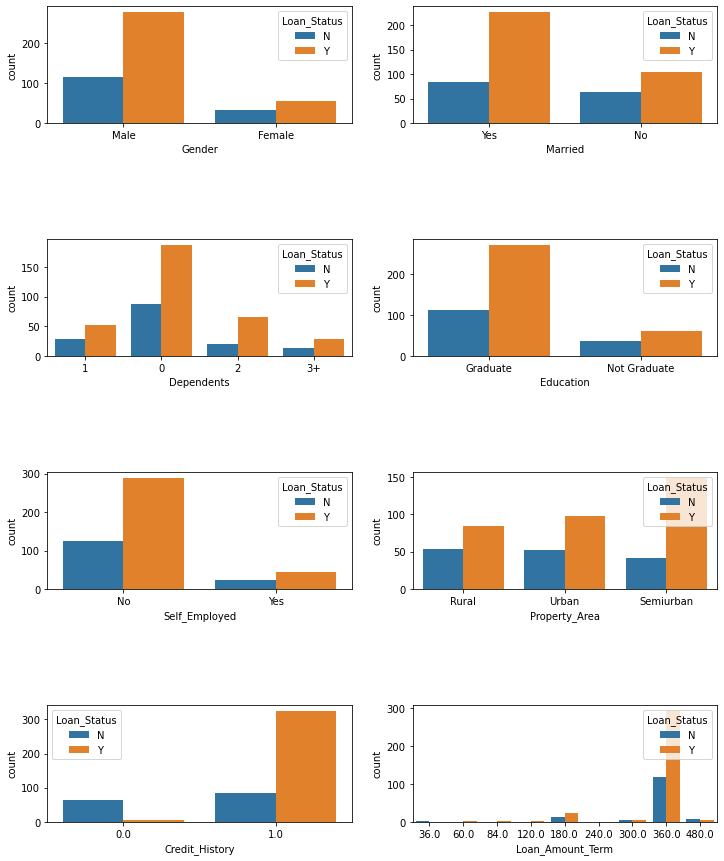

In [10]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       480.000000         480.000000  480.000000
mean       5364.231250        1581.093583  144.735417
std        5668.251251        2617.692267   80.508164
min         150.000000           0.000000    9.000000
25%        2898.750000           0.000000  100.000000
50%        3859.000000        1084.500000  128.000000
75%        5852.500000        2253.250000  170.000000
max       81000.000000       33837.000000  600.000000


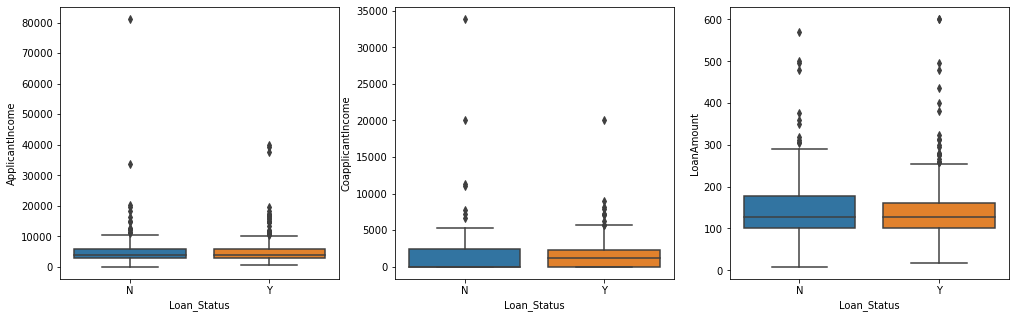

In [11]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [12]:
print('\n\nColumn Names\n\n')
print(df.columns)

#label encode the target variable
encode = LabelEncoder()
df.Loan_Status = encode.fit_transform(df.Loan_Status)

# drop the null values
df.dropna(how='any',inplace=True)



Column Names


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')


# Logistics Regression

In [13]:

# train-test-split   
train , test = train_test_split(df,test_size=0.25,random_state=42)



# seperate the target and independent variable
train_x = train.drop(columns=['Loan_Status'],axis=1)
train_y = train['Loan_Status']

test_x = test.drop(columns=['Loan_Status'],axis=1)
test_y = test['Loan_Status']

# encode the data
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

# create the object of the model
model = LogisticRegression(max_iter=500)

model.fit(train_x,train_y)

predict = model.predict(test_x)



#print('\n\nAccuracy Score on test data : \n\n')
#print(accuracy_score(test_y,predict))

print(classification_report(test_y, predict))
print(confusion_matrix(test_y, predict))
LRAcc=accuracy_score(predict,test_y)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

shape of training data :  (360, 24)
shape of testing data :  (120, 24)
              precision    recall  f1-score   support

           0       0.93      0.34      0.50        38
           1       0.76      0.99      0.86        82

    accuracy                           0.78       120
   macro avg       0.85      0.66      0.68       120
weighted avg       0.82      0.78      0.75       120

[[13 25]
 [ 1 81]]
LR accuracy: 78.33%


In [14]:
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1]


# K-Nearest Neighbour (KNN)

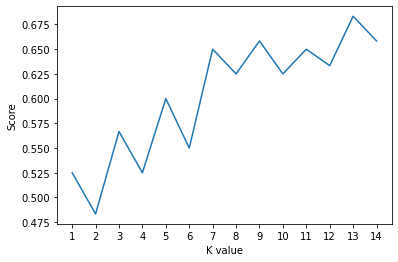

              precision    recall  f1-score   support

           0       0.93      0.34      0.50        38
           1       0.76      0.99      0.86        82

    accuracy                           0.78       120
   macro avg       0.85      0.66      0.68       120
weighted avg       0.82      0.78      0.75       120

KNN best accuracy: 68.33%


In [15]:

scoreListknn = []

for i in range(1,15):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(train_x,train_y)
    scoreListknn.append(KNclassifier.score(test_x, test_y))
    
plt.plot(range(1,15), scoreListknn)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print(classification_report(test_y, predict))

print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

# Support Vector Machine (SVM)

In [16]:


SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(train_x, train_y)

y_pred = SVCclassifier.predict(test_x)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,test_y)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

[[ 0 38]
 [ 0 82]]
SVC accuracy: 68.33%


C:\Users\rahul\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Prec

# Gaussian NB

In [17]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(train_x, train_y)

y_pred = NBclassifier2.predict(test_x)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,test_y)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.80      0.42      0.55        38
           1       0.78      0.95      0.86        82

    accuracy                           0.78       120
   macro avg       0.79      0.69      0.70       120
weighted avg       0.79      0.78      0.76       120

[[16 22]
 [ 4 78]]
Gaussian Naive Bayes accuracy: 78.33%


# Decision Tree

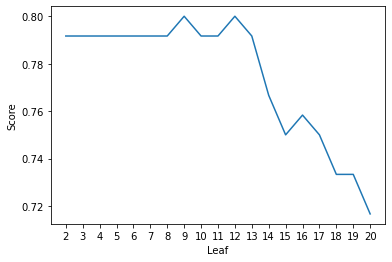

Decision Tree Accuracy: 80.00%


In [18]:
from sklearn.tree import DecisionTreeClassifier
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(train_x, train_y)
    scoreListDT.append(DTclassifier.score(test_x, test_y))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))


# Random Forest

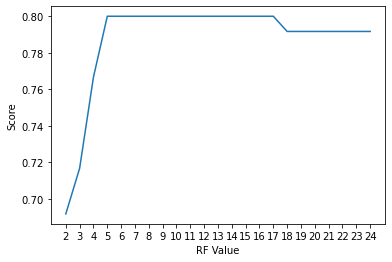

Random Forest Accuracy:  80.00%


In [19]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(train_x, train_y)
    scoreListRF.append(RFclassifier.score(test_x, test_y))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

# Gradient Boosting

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(train_x, train_y)


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [21]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=5, subsample=0.5)
0.8138888888888889
{'subsample': 0.5, 'n_estimators': 100, 'max_leaf_nodes': 5, 'max_depth': 4}
0


In [22]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(train_x, train_y)

y_pred = GBclassifier.predict(test_x)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,test_y)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.79      0.91      0.85        82

    accuracy                           0.78       120
   macro avg       0.75      0.69      0.71       120
weighted avg       0.77      0.78      0.76       120

[[18 20]
 [ 7 75]]
Gradient Boosting accuracy: 77.50%


# Model Comparison

In [23]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM','Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Decision Tree,80.000000
5,Random Forest,80.000000
0,Logistic Regression,78.333333
3,Gaussian NB,78.333333
6,Gradient Boost,77.500000
1,K Neighbors,68.333333
2,SVM,68.333333
